In [1]:
import pynbody
import numpy as np
import matplotlib.pyplot as plt

# To let test simulations in 4 functions originated from the same seed
mu=0

np.random.seed(5)
pos=np.random.uniform(size=(10000,3))

np.random.seed(5)
vel=np.random.normal(loc=mu,scale=1,size=(10000,3))

np.random.seed(57)
normalize=np.random.normal(size=(10000,3))

In [2]:
def iso(N):
    
    pynbody.config['sph']['smooth-particles']=N
    
    ######################################################################
    # Generating test simulation
    
    f=pynbody.new(dm=10000)
    f.properties['boxsize']=1
    f.dm['pos']=pos
    f.dm['pos'].units='m'

    f.dm['vel']=vel
    f.dm['vel'].units='m s**-1'

    f.dm['mass']=np.ones(10000)
    f.dm['mass'].units='kg'
    
    ######################################################################
    # Calcualting velocity dispersion

    density=f.dm['rho']
    
    vel_disp_iso=f.dm.kdtree.sph_mean((f.dm['vel'].in_units('m s**-1')-f.dm.kdtree.sph_mean(f.dm['vel'].in_units('m s**-1')))**2)
    
    vx_disp_iso=vel_disp_iso[:,0]
    vy_disp_iso=vel_disp_iso[:,1]
    vz_disp_iso=vel_disp_iso[:,2]

    return (vx_disp_iso+vy_disp_iso+vz_disp_iso)/3

In [3]:
def ani(N):
    
    pynbody.config['sph']['smooth-particles']=N
    
    ######################################################################
    # Generating test simulation
    
    f=pynbody.new(dm=10000)
    f.properties['boxsize']=1
    f.dm['pos']=pos
    f.dm['pos'].units='m'

    f.dm['vel']=vel
    f.dm['vel'].units='m s**-1'

    f.dm['mass']=np.ones(10000)
    f.dm['mass'].units='kg'

    ######################################################################
    # Calcualting velocity dispersion
    
    density=f.dm['rho']
    
    dvel_ani=f.dm['vel'].in_units('m s**-1')-f.dm.kdtree.sph_mean(f.dm['vel'].in_units('m s**-1'))
    
    dvx_ani=dvel_ani[:,0]
    dvy_ani=dvel_ani[:,1]
    dvz_ani=dvel_ani[:,2]
    
    disp_xx_ani=f.dm.kdtree.sph_mean(dvx_ani**2)
    disp_yy_ani=f.dm.kdtree.sph_mean(dvy_ani**2)
    disp_zz_ani=f.dm.kdtree.sph_mean(dvz_ani**2)
    
    disp_xy_ani=f.dm.kdtree.sph_mean(dvx_ani*dvy_ani)
    disp_yz_ani=f.dm.kdtree.sph_mean(dvy_ani*dvz_ani)
    disp_zx_ani=f.dm.kdtree.sph_mean(dvz_ani*dvx_ani)
    
    det_disp_ani=disp_xx_ani*(disp_yy_ani*disp_zz_ani-disp_yz_ani**2)-disp_xy_ani*(disp_xy_ani*disp_zz_ani-disp_yz_ani*disp_zx_ani)+disp_zx_ani*(disp_xy_ani*disp_yz_ani-disp_yy_ani*disp_zx_ani)
    
    return det_disp_ani**(1/3)

In [4]:
def iso_n(N):
    
    pynbody.config['sph']['smooth-particles']=N
    
    ######################################################################
    # Generating test simulation
    
    f=pynbody.new(dm=10000)
    f.properties['boxsize']=1
    f.dm['pos']=pos
    f.dm['pos'].units='m'

    f.dm['vel']=vel
    f.dm['vel'].units='m s**-1'

    f.dm['mass']=np.ones(10000)
    f.dm['mass'].units='kg'
    
    f.dm['normalisation']=normalize
    
    ######################################################################
    # Calcualting velocity dispersion
    
    density=f.dm['rho']
    
    ave_vel=np.mean(f.dm['vel'].in_units('m s**-1'))
    vel_bar=f.dm['vel'].in_units('m s**-1')-ave_vel
    
    vel_disp_iso=f.dm.kdtree.sph_mean((vel_bar-f.dm.kdtree.sph_mean(vel_bar))**2)
    
    vx_disp_iso=vel_disp_iso[:,0]
    vy_disp_iso=vel_disp_iso[:,1]
    vz_disp_iso=vel_disp_iso[:,2]
    
    sigma_iso=(vx_disp_iso+vy_disp_iso+vz_disp_iso)/3
    
    ######################################################################
    # Calculating normalization dispersion
    
    norm1=f.dm.kdtree.sph_mean(f.dm['normalisation'])
    norm2=f.dm.kdtree.sph_mean((f.dm['normalisation']-norm1)**2)
    
    nx=norm2[:,0]
    ny=norm2[:,1]
    nz=norm2[:,2]
    
    norm=(nx+ny+nz)/3

    return sigma_iso/norm

In [5]:
def ani_n(N):
    
    pynbody.config['sph']['smooth-particles']=N
    
    ######################################################################
    # Generating test simulation
    
    f=pynbody.new(dm=10000)
    f.properties['boxsize']=1
    f.dm['pos']=pos
    f.dm['pos'].units='m'

    f.dm['vel']=vel
    f.dm['vel'].units='m s**-1'

    f.dm['mass']=np.ones(10000)
    f.dm['mass'].units='kg'
    
    f.dm['normalisation']=normalize
    
    ######################################################################
    # Calcualting velocity dispersion
    
    density=f.dm['rho']
    
    ave_vel=np.mean(f.dm['vel'].in_units('m s**-1'))
    vel_bar=f.dm['vel'].in_units('m s**-1')-ave_vel
    
    dvel_ani=vel_bar-f.dm.kdtree.sph_mean(vel_bar)
    
    dvx_ani=dvel_ani[:,0]
    dvy_ani=dvel_ani[:,1]
    dvz_ani=dvel_ani[:,2]
    
    disp_xx_ani=f.dm.kdtree.sph_mean(dvx_ani**2)
    disp_yy_ani=f.dm.kdtree.sph_mean(dvy_ani**2)
    disp_zz_ani=f.dm.kdtree.sph_mean(dvz_ani**2)
    
    disp_xy_ani=f.dm.kdtree.sph_mean(dvx_ani*dvy_ani)
    disp_yz_ani=f.dm.kdtree.sph_mean(dvy_ani*dvz_ani)
    disp_zx_ani=f.dm.kdtree.sph_mean(dvz_ani*dvx_ani)
    
    det_disp_ani=disp_xx_ani*(disp_yy_ani*disp_zz_ani-disp_yz_ani**2)-disp_xy_ani*(disp_xy_ani*disp_zz_ani-disp_yz_ani*disp_zx_ani)+disp_zx_ani*(disp_xy_ani*disp_yz_ani-disp_yy_ani*disp_zx_ani)
    sigma_ani=det_disp_ani**(1/3)
    
    ######################################################################
    # Calculating normalization dispersion
    
    dnorm=f.dm['normalisation']-f.dm.kdtree.sph_mean(f.dm['normalisation'])
    
    dnormx=dnorm[:,0]
    dnormy=dnorm[:,1]
    dnormz=dnorm[:,2]
    
    n2_xx=f.dm.kdtree.sph_mean(dnormx**2)
    n2_yy=f.dm.kdtree.sph_mean(dnormy**2)
    n2_zz=f.dm.kdtree.sph_mean(dnormz**2)
    
    n2_xy=f.dm.kdtree.sph_mean(dnormx*dnormy)
    n2_yz=f.dm.kdtree.sph_mean(dnormy*dnormz)
    n2_zx=f.dm.kdtree.sph_mean(dnormz*dnormx)
    
    norm6=n2_xx*(n2_yy*n2_zz-n2_yz**2)-n2_xy*(n2_xy*n2_zz-n2_yz*n2_zx)+n2_zx*(n2_xy*n2_yz-n2_yy*n2_zx)
    norm=norm6**(1/3)
    
    
    return sigma_ani/norm

In [11]:
# Defining a function that plots the histogram
nBins=100

def his(x,y_range,textpos):
    
    # Source codes from simpleMC.py of http://www.pp.rhul.ac.uk/~cowan/stat/root/mc/
    n=len(x)
    
    fig, ax = plt.subplots(1,1,figsize=(20,16))
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(left=0.15)
    
    color=['blue','orange']
    nMean=1000
    plt.plot(np.mean(x[0])*np.ones(nMean),np.linspace(0,y_range,nMean),linewidth=3,linestyle='--',c='blue')
    plt.plot(np.mean(x[1])*np.ones(nMean),np.linspace(0,y_range,nMean),linewidth=3,linestyle='--',c='orange')
    #plt.plot(np.ones(nMean),np.linspace(0,350,nMean),linewidth=3,linestyle='--',c='red')
    plt.annotate('',xy=(np.mean(x[0]),460),xytext=(textpos,460),arrowprops=dict(facecolor='blue',edgecolor='blue',shrink=0.005))
    plt.annotate('',xy=(np.mean(x[1]),430),xytext=(textpos,430),arrowprops=dict(facecolor='orange',edgecolor='orange',shrink=0.005))
    plt.text(textpos,455,'The isotropic mean is %.3f'%np.mean(x[0]),fontsize=30)
    plt.text(textpos,425,'The anisotropic mean is %.3f'%np.mean(x[1]),fontsize=30)
    #plt.text(0.9,355,'Expected value',fontsize=30,color='red')
    
    for i in range(n):
        xHist, bin_edges = np.histogram(x[i], bins=nBins, range=(np.min(x[i]), np.max(x[i]))) #Modified
        binLo, binHi = bin_edges[:-1], bin_edges[1:]
    
        xPlot = np.array([binLo, binHi]).T.flatten()
        yPlot = np.array([xHist, xHist]).T.flatten()
    
        ax.set_xlim((np.min(x), np.max(x)))
        ax.set_ylim((0., y_range))  #Modified
        
        labels=['Isotropic','Anisotropic']
        plt.plot(xPlot, yPlot,label=labels[i],linewidth=5,c=color[i])
    
    font1={'family':'Times New Roman','weight':'normal','size':40}
    
    plt.legend(prop=font1,loc='lower right')
    plt.xlabel('$velocity\\ dispersions\\ \sigma^{2} $',font1,labelpad=0)
    plt.ylabel('$frequencies$',font1,labelpad=0)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    
    plt.savefig('sigma_show %s.pdf'%textpos,pad_inches=0.0)

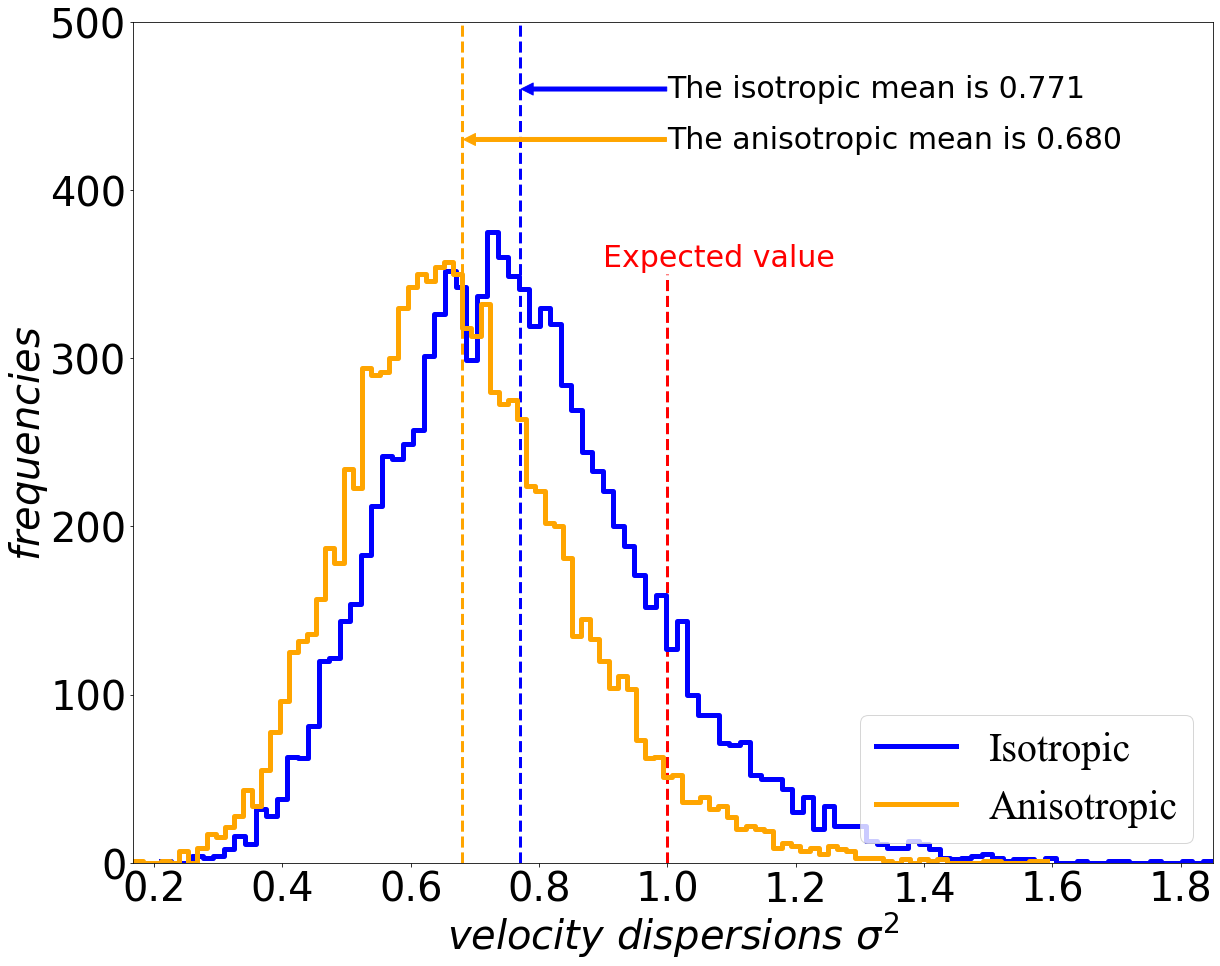

In [12]:
Unnormalized=np.zeros((2,10000))

Unnormalized[0]=iso(64)
Unnormalized[1]=ani(64)

his(Unnormalized,500,1)

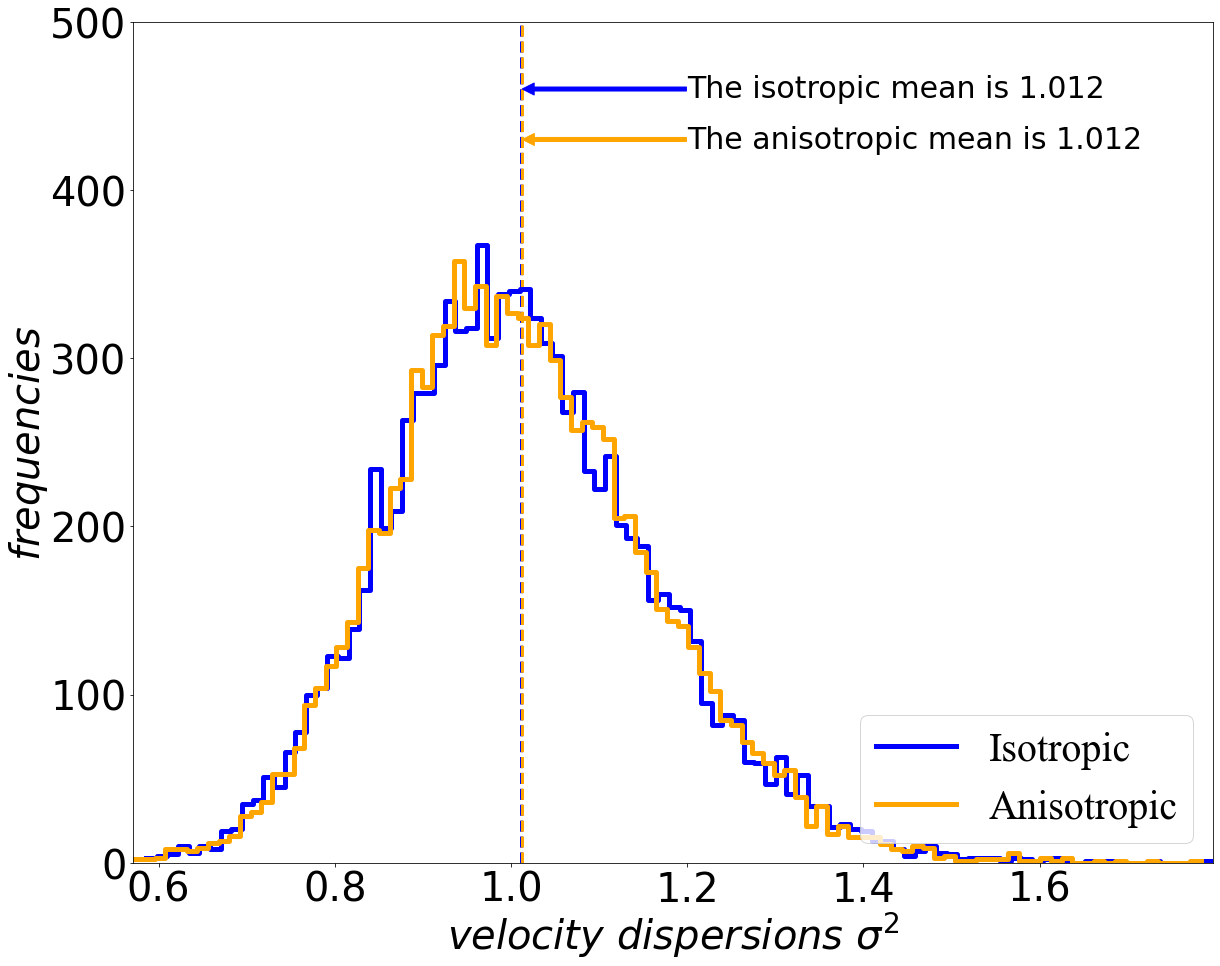

In [12]:
Normalized=np.zeros((2,10000))

Normalized[0]=iso_n(256)
Normalized[1]=ani_n(256)

his(Normalized,500,1.2)

In [13]:
test1=np.zeros((5,235))

for i in range(235):
    test1[0,i]=i+43
    test1[1,i]=np.mean(iso(i+43))
    test1[2,i]=np.mean(ani(i+43))
    test1[3,i]=np.mean(iso_n(i+43))
    test1[4,i]=np.mean(ani_n(i+43))
    print(i,'finished')

0 finished
1 finished
2 finished
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished
10 finished
11 finished
12 finished
13 finished
14 finished
15 finished
16 finished
17 finished
18 finished
19 finished
20 finished
21 finished
22 finished
23 finished
24 finished
25 finished
26 finished
27 finished
28 finished
29 finished
30 finished
31 finished
32 finished
33 finished
34 finished
35 finished
36 finished
37 finished
38 finished
39 finished
40 finished
41 finished
42 finished
43 finished
44 finished
45 finished
46 finished
47 finished
48 finished
49 finished
50 finished
51 finished
52 finished
53 finished
54 finished
55 finished
56 finished
57 finished
58 finished
59 finished
60 finished
61 finished
62 finished
63 finished
64 finished
65 finished
66 finished
67 finished
68 finished
69 finished
70 finished
71 finished
72 finished
73 finished
74 finished
75 finished
76 finished
77 finished
78 finished
79 finished
80 finished
81 finished
82 finished
83 finished
84

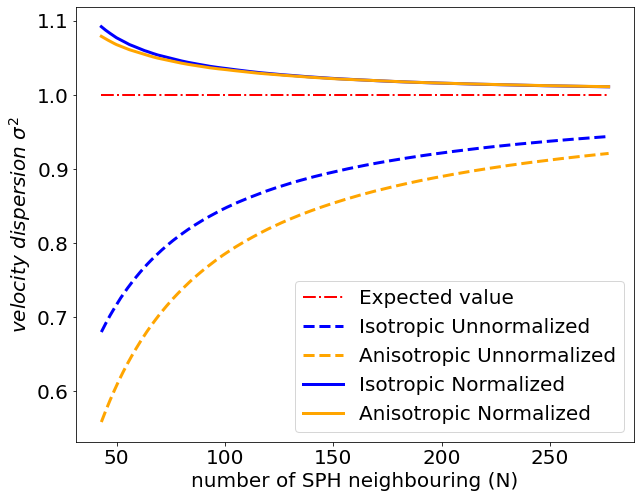

In [19]:
plt.figure(figsize=(10,8))
plt.plot(test1[0],np.ones(len(test1[0])),label='Expected value',linestyle='-.',color='red',linewidth=2)
plt.plot(test1[0],test1[1],label='Isotropic Unnormalized',linestyle='--',color='blue',linewidth=3)
plt.plot(test1[0],test1[2],label='Anisotropic Unnormalized',linestyle='--',color='orange',linewidth=3)
plt.plot(test1[0],test1[3],label='Isotropic Normalized',linestyle='-',color='blue',linewidth=3)
plt.plot(test1[0],test1[4],label='Anisotropic Normalized',linestyle='-',color='orange',linewidth=3)
plt.xlabel('number of SPH neighbouring (N)',fontsize=20)
plt.ylabel('$velocity\\ dispersion\\ \sigma^2$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig('debugging.pdf',pad_inches=0.0)

In [20]:
test2=np.zeros((3,235))

for i in range(235):
    test2[0,i]=i+43
    test2[1,i]=test1[1,i]/test1[2,i]
    test2[2,i]=test1[3,i]/test1[4,i]

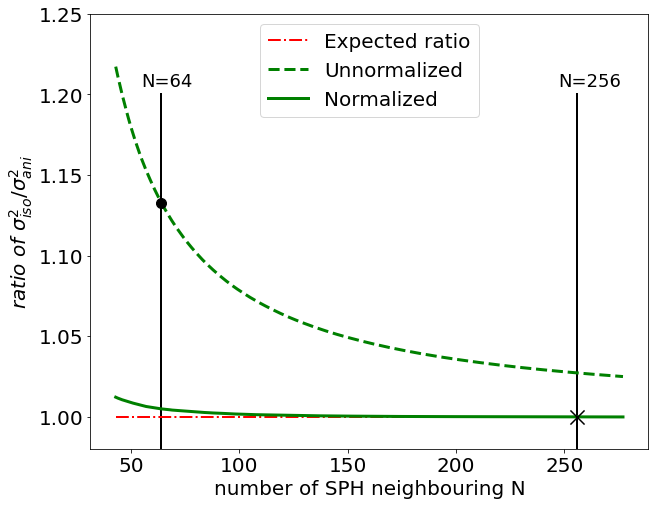

In [21]:
plt.figure(figsize=(10,8))

plt.plot(64*np.ones(1000),np.linspace(0.98,1.2,1000),linestyle='-',color='black',linewidth=2,zorder=1)
plt.text(55,1.205,'N=64',fontsize=18)

plt.plot(256*np.ones(1000),np.linspace(0.98,1.2,1000),linestyle='-',color='black',linewidth=2,zorder=1)
plt.text(247,1.205,'N=256',fontsize=18)

plt.plot(test2[0],np.ones(len(test2[0])),label='Expected ratio',linestyle='-.',color='red',linewidth=2,zorder=1)
plt.plot(test2[0],test2[1],label='Unnormalized',linestyle='--',color='green',linewidth=3,zorder=1)
plt.plot(test2[0],test2[2],label='Normalized',linestyle='-',color='green',linewidth=3,zorder=1)

plt.scatter(64,test2[1][21],s=100,marker='o',color='black',zorder=2)
plt.scatter(256,test2[2][181],s=200,marker='x',color='black',zorder=2)



plt.xlabel('number of SPH neighbouring N',fontsize=20)
plt.ylabel('$ratio\\ of\\ \sigma_{iso}^2/\sigma_{ani}^2$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0.98,1.25])
plt.legend(fontsize=20)
plt.savefig('ratio.pdf',pad_inches=0.0)